# Import Different Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import f1_score, classification_report , accuracy_score, confusion_matrix ,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier as XGBRFClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Basic Data Analysis

In [2]:
file_path = '/content/drive/MyDrive/emotion_classification/mel_mean_plus_audio_features_gender_intensity.csv'
df = pd.read_csv(file_path)
df.head()

,mel_1,mel_2,mel_3,mel_4,mel_5,mel_6,mel_7,mel_8,mel_9,mel_10,...,tonnetz_2,tonnetz_3,tonnetz_4,tonnetz_5,tonnetz_6,zcr,rmse,gender,intensity,emotion
0,-70.655457,-68.369980,-67.705742,-67.330467,-62.240829,-55.497036,-51.542595,-47.762424,-46.360947,-49.937832,...,0.039097,-0.051205,-0.026970,-0.000133,-0.019666,0.181768,0.015609,0.0,1.0,angry
1,-72.314018,-68.822762,-65.775558,-65.801338,-65.692055,-60.803020,-58.615334,-56.168446,-54.690483,-54.336365,...,0.040009,-0.086314,0.083370,0.001419,-0.001496,0.156333,0.006987,0.0,1.0,surprised
2,-73.161072,-71.349533,-69.594612,-69.925545,-67.570358,-64.556984,-62.838047,-60.212967,-57.506607,-55.255634,...,0.013919,0.009190,0.063062,-0.005817,-0.012488,0.176476,0.016331,0.0,2.0,surprised
3,-67.941032,-66.689468,-66.536446,-66.676514,-65.628128,-63.220478,-61.127796,-55.859779,-53.232128,-50.436695,...,0.043551,0.001958,0.036539,-0.013295,-0.000431,0.193014,0.010081,0.0,1.0,fearful
4,-67.721306,-67.691719,-68.883591,-69.845856,-68.610413,-66.581444,-65.777794,-63.005062,-60.181870,-57.147827,...,0.000435,0.017535,-0.024363,0.017719,0.025629,0.292691,0.023641,0.0,2.0,happy


In [3]:
df.shape


(2452, 197)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Columns: 197 entries, mel_1 to emotion
dtypes: float64(196), object(1)
memory usage: 3.7+ MB


In [5]:
df.describe()

,mel_1,mel_2,mel_3,mel_4,mel_5,mel_6,mel_7,mel_8,mel_9,mel_10,...,tonnetz_1,tonnetz_2,tonnetz_3,tonnetz_4,tonnetz_5,tonnetz_6,zcr,rmse,gender,intensity
count,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,...,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000
mean,-60.621190,-62.879458,-63.631561,-63.401319,-59.982751,-55.544666,-53.223799,-52.481429,-53.039523,-53.373150,...,-0.023622,0.036076,-0.061869,0.026726,-0.008623,-0.002670,0.210430,0.015318,0.508972,1.461664
std,10.041665,7.578014,8.230457,9.409732,10.064275,11.254692,12.036273,10.289384,8.160372,6.497998,...,0.037178,0.041932,0.079857,0.067314,0.027506,0.020687,0.058089,0.015495,0.500021,0.498630
min,-79.509834,-79.250198,-78.780739,-79.144135,-79.049263,-78.632179,-78.245750,-77.040276,-76.267029,-76.072670,...,-0.181158,-0.131722,-0.353548,-0.211073,-0.129072,-0.090921,0.076889,0.000388,0.000000,1.000000
25%,-68.989193,-68.603855,-69.193949,-69.925615,-68.813021,-66.032688,-64.304029,-61.519860,-58.613477,-57.216021,...,-0.045045,0.007955,-0.102501,-0.019222,-0.025687,-0.014894,0.164532,0.004983,0.000000,1.000000
50%,-62.164433,-63.959528,-65.110229,-65.362049,-60.049583,-53.761995,-51.390369,-49.942526,-51.103928,-53.045059,...,-0.023198,0.029988,-0.049932,0.021506,-0.005272,-0.000826,0.208956,0.010390,1.000000,1.000000
75%,-52.466642,-58.152250,-60.471777,-60.316793,-52.392362,-45.437257,-42.708370,-44.133889,-47.312175,-48.953797,...,-0.001041,0.057235,-0.006469,0.070255,0.010795,0.010249,0.249800,0.019753,1.000000,2.000000
max,-27.222149,-27.535501,-20.906517,-25.090845,-32.076038,-32.543545,-26.827435,-30.682407,-32.792862,-35.554211,...,0.112720,0.230566,0.140679,0.256778,0.060847,0.069421,0.438653,0.116412,1.000000,2.000000


# Basic Exploratory Data Analysis

/tmp/ipython-input-6-2277257670.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emotion', data=df, order=df['emotion'].value_counts().index, palette='Set2')


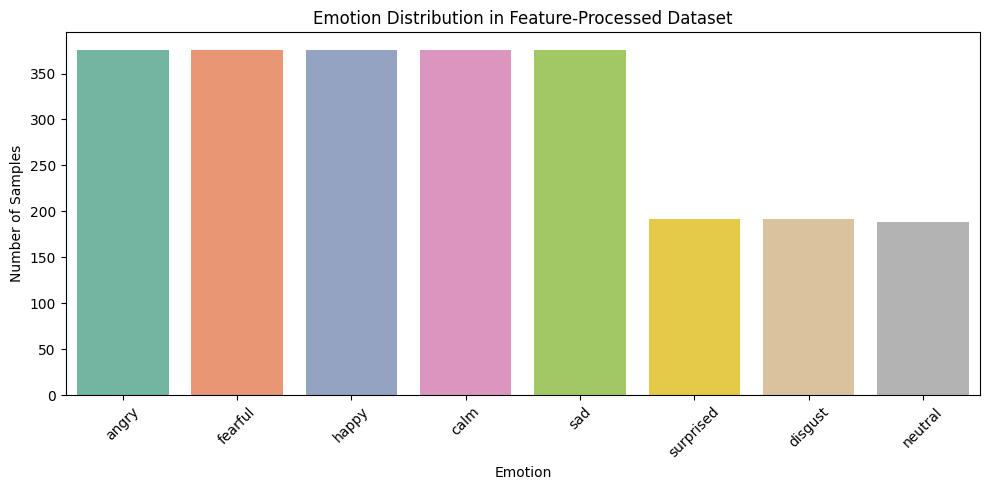

In [6]:
# 1. Emotion class distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='emotion', data=df, order=df['emotion'].value_counts().index, palette='Set2')
plt.title('Emotion Distribution in Feature-Processed Dataset')
plt.xlabel('Emotion')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


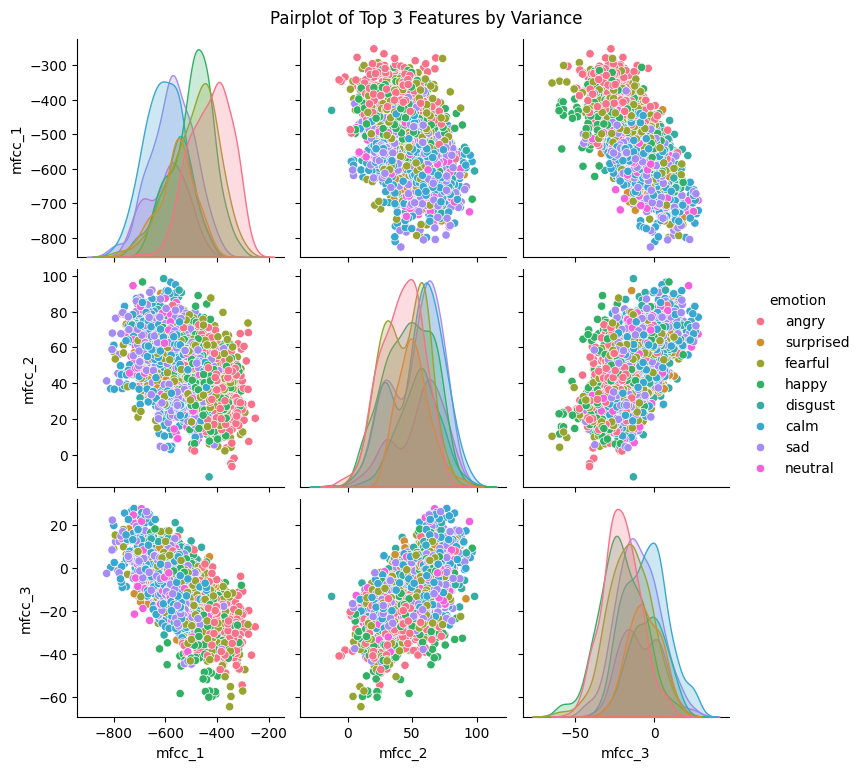

In [7]:
# 2. Pairplot using top 3 features by variance
feature_variances = df.drop('emotion', axis=1).var().sort_values(ascending=False)
top_features = feature_variances.head(3).index.tolist()
sns.pairplot(df[top_features + ['emotion']], hue='emotion', palette='husl')
plt.suptitle('Pairplot of Top 3 Features by Variance', y=1.02)
plt.show()

/tmp/ipython-input-8-4224687464.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='emotion', y=feature, data=df, palette='Set3')


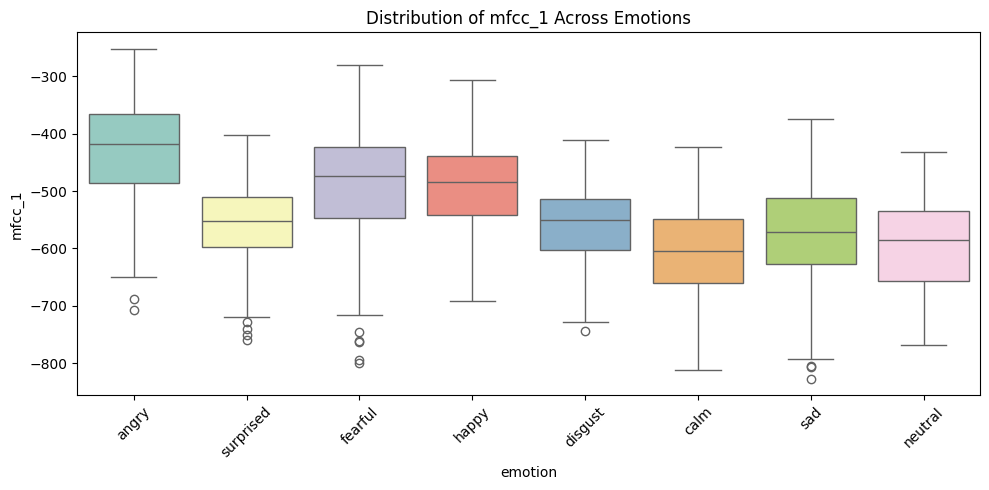

/tmp/ipython-input-8-4224687464.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='emotion', y=feature, data=df, palette='Set3')


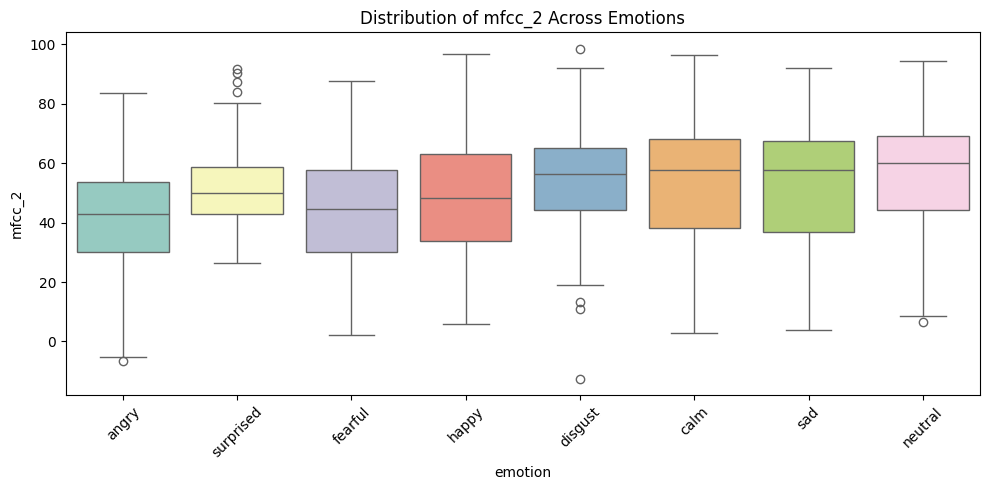

/tmp/ipython-input-8-4224687464.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='emotion', y=feature, data=df, palette='Set3')


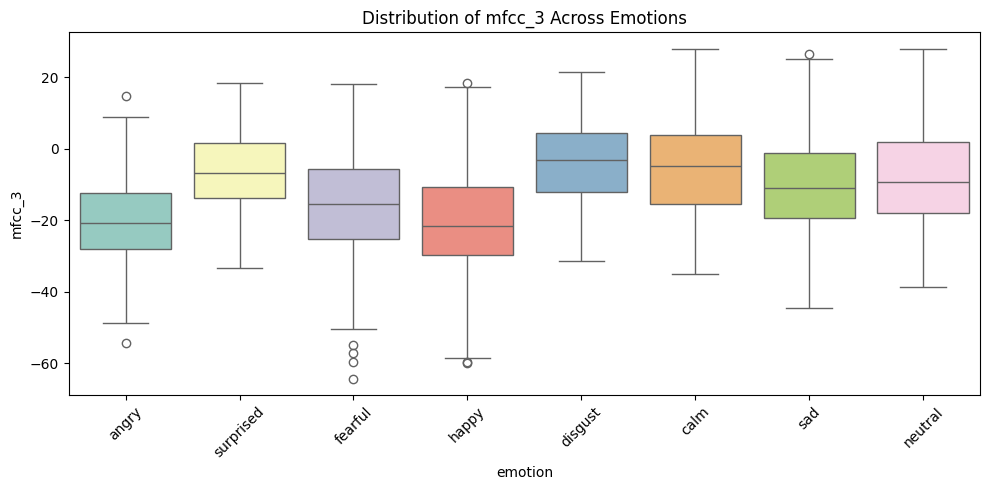

In [8]:
for feature in top_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='emotion', y=feature, data=df, palette='Set3')
    plt.title(f'Distribution of {feature} Across Emotions')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

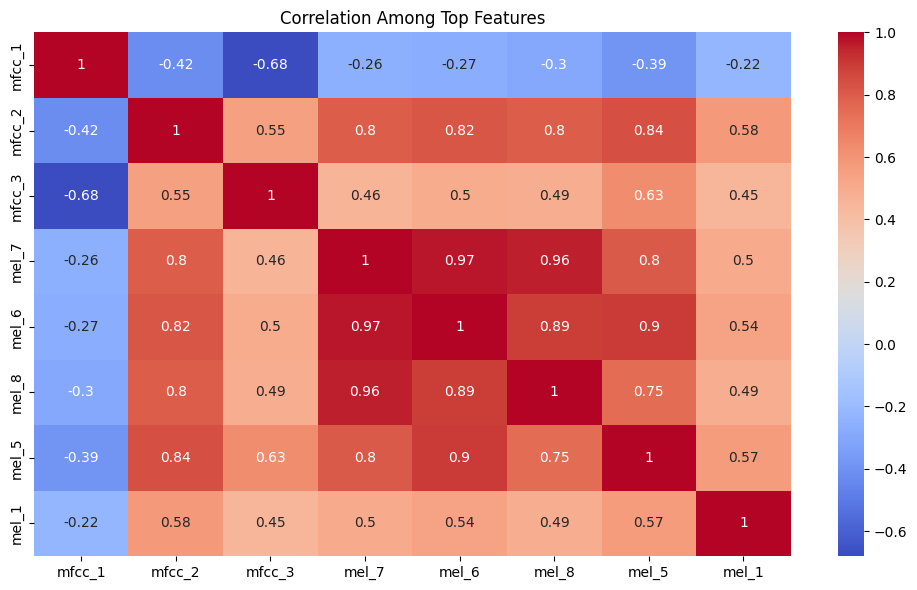

In [9]:
top_corr_features = feature_variances.head(8).index.tolist()
plt.figure(figsize=(10, 6))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Among Top Features')
plt.tight_layout()
plt.show()


# some key insights drawn
* Emotions are Fairly Balanced:
There's a healthy mix of emotion classes like happy, sad, angry, etc. No single class dominates, so the model will not be biased

* Patterns Are Emotion-Specific:
Emotions like 'happy' and 'sad' show distinct behavior in boxplots and pairplots. This means the features are capturing the emotional tones well.




# feature engineering


In [10]:
X = df.drop('emotion', axis=1)
y = df['emotion']

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
num_classes = len(np.unique(y))

In [12]:
label_map = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Label Encoding Mapping:")
for emotion, code in label_map.items():
    print(f"{code} → {emotion}")

Label Encoding Mapping:
0 → angry
1 → calm
2 → disgust
3 → fearful
4 → happy
5 → neutral
6 → sad
7 → surprised


In [13]:
label_encoder.classes_

array(['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad',
       'surprised'], dtype=object)

In [14]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [15]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Random Forest":RandomForestClassifier(),
    "SVC":SVC(),
    "Naive Bayes":GaussianNB(),
    "K-Neighbors Classifier":KNeighborsClassifier(),
    "AdaBoost Classifier":AdaBoostClassifier(),
    "Gradient Boosting":GradientBoostingClassifier(),
    "XGB Classifier":XGBRFClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred,average='macro') # Calculate Precision
    model_test_recall = recall_score(y_train, y_train_pred,average='macro') # Calculate Recall
    model_test_confusion_matrix = confusion_matrix(y_train, y_train_pred) # Calculate Confusion Matrix


    print(list(models.keys())[i])

    print('Classification Report')
    print(classification_report(y_test,y_test_pred))
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('Confusion Matrix:')
    print(model_test_confusion_matrix)



    print('='*35)

    print('\n')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logisitic Regression
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.73      0.74        75
           1       0.75      0.68      0.71        75
           2       0.75      0.54      0.63        39
           3       0.53      0.57      0.55        75
           4       0.65      0.61      0.63        75
           5       0.63      0.71      0.67        38
           6       0.63      0.69      0.66        75
           7       0.61      0.69      0.65        39

    accuracy                           0.66       491
   macro avg       0.66      0.65      0.65       491
weighted avg       0.66      0.66      0.66       491

- Accuracy: 0.6558
- F1 score: 0.6564
- Precision: 0.6622
- Recall: 0.8284
Confusion Matrix:
[[268   2   7  10   9   1   1   3]
 [  0 266   6   1   5   9  14   0]
 [  9   2 114   7   6   2   9   4]
 [ 13   4   4 236  15   0  21   8]
 [  7   9   3  27 242   1   3   9]
 [  0   4   2   0   1 129  12   2]
 [ 

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

In [21]:
model1 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.fit(X_train_scaled, y_train_cat, validation_data=(X_test_scaled, y_test_cat),
           epochs=300, batch_size=32, verbose=0, callbacks=[EarlyStopping(patience=7, restore_best_weights=True)])
y_pred1 = np.argmax(model1.predict(X_test_scaled), axis=1)
f1 = f1_score(y_test, y_pred1, average='weighted')
accuracy = accuracy_score(y_test, y_pred1)
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print("F1 Score:", f1)
print("Accuracy:", accuracy)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       0.88      0.89      0.89        75
           1       0.76      0.79      0.77        75
           2       0.79      0.59      0.68        39
           3       0.70      0.72      0.71        75
           4       0.88      0.76      0.81        75
           5       0.69      0.76      0.72        38
           6       0.69      0.75      0.72        75
           7       0.74      0.82      0.78        39

    accuracy                           0.77       491
   macro avg       0.77      0.76      0.76       491
weighted avg       0.77      0.77      0.77       491

[[67  0  2  3  1  0  0  2]
 [ 0 59  1  1  2  5  7  0]
 [ 3  3 23  0  3  2  3  2]
 [ 4  1  0 54  1  1 11  3]
 [ 0  6  0  8 57  1  0  3]
 [ 0  5  1  0  0 29  3  0]
 [ 1  4  1  9  0  3 56  1]
 [ 1  0  1  2  1  1  1 32]]
F1 Score: 0.7677756865149568
Accuracy: 0.7678207739307535


Since out of many models and neural networks, ANN model is giving best accuracy and weighted F1 score. So we will use this neural network to predict our test data.

here since disgust and fearful class is not showing optimum accuracy we'll drop

In [22]:
df = df[~df['emotion'].isin(['disgust','fearful'])].reset_index(drop=True)
df.shape

(1884, 197)

In [23]:
X_new = df.drop('emotion', axis=1)
y_new= df['emotion']

In [24]:
X_new.shape,y_new.shape

((1884, 196), (1884,))

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_new = label_encoder.fit_transform(y_new)
num_classes = len(np.unique(y_new))

In [26]:
y_new.shape

(1884,)

In [27]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, stratify=y_new, random_state=42)

In [28]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

In [32]:
model1 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.fit(X_train_scaled, y_train_cat, validation_data=(X_test_scaled, y_test_cat),
           epochs=300, batch_size=32, verbose=0, callbacks=[EarlyStopping(patience=7, restore_best_weights=True)])
y_pred1 = np.argmax(model1.predict(X_test_scaled), axis=1)
f1 = f1_score(y_test, y_pred1, average='weighted')
accuracy = accuracy_score(y_test, y_pred1)
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print("F1 Score:", f1)
print("Accuracy:", accuracy)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        75
           1       0.77      0.80      0.78        75
           2       0.86      0.84      0.85        75
           3       0.71      0.79      0.75        38
           4       0.77      0.72      0.74        75
           5       0.82      0.79      0.81        39

    accuracy                           0.82       377
   macro avg       0.81      0.82      0.81       377
weighted avg       0.82      0.82      0.82       377

[[71  0  2  0  0  2]
 [ 1 60  2  4  8  0]
 [ 2  5 63  2  1  2]
 [ 0  2  0 30  5  1]
 [ 0 10  4  5 54  2]
 [ 2  1  2  1  2 31]]
F1 Score: 0.8195473433839099
Accuracy: 0.8196286472148541


Here with optimum precsion,overall accuracy and accuracy of each class,we assumed our model to be trained with ANN neural network and important emotions.

#Load Train Data

In [33]:
import joblib
joblib.dump(model1, 'trained_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']